In [57]:
import pandas as pd
import seaborn as sns

In [58]:
df = pd.read_csv('SPYIndicators.csv')

<AxesSubplot:>

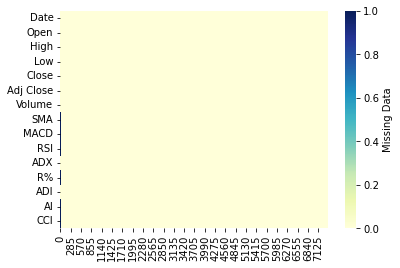

In [59]:
# The only missing values are the first few days/weeks as some of the indicators needed prior knowledge
sns.heatmap(df.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})

In [66]:
# Let's drop days that have missing values 
df = df.dropna()
df[2:]

,Date,Open,High,Low,Close,Adj Close,Volume,SMA,MACD,RSI,ADX,R%,ADI,AI,CCI
27,1993-03-10,45.593750,45.687500,45.406250,45.687500,26.451275,194400,44.640625,0.350382,67.773888,15.877847,-2.597403,2.941582e+06,78.571429,112.884456
28,1993-03-11,45.718750,45.843750,45.500000,45.562500,26.378910,70900,44.783482,0.371847,65.106755,16.860585,-11.842105,2.896464e+06,64.285714,104.048234
29,1993-03-12,45.187500,45.218750,44.812500,45.093750,26.107515,643600,44.881696,0.347035,56.178467,15.969533,-31.578947,3.144003e+06,64.285714,27.290448
30,1993-03-15,45.062500,45.312500,45.062500,45.312500,26.234148,310800,44.997768,0.341090,59.003846,15.332047,-25.000000,3.454803e+06,57.142857,43.742862
31,1993-03-16,45.312500,45.437500,45.312500,45.312500,26.234148,30800,45.073661,0.332545,59.003846,14.995038,-30.909091,3.424003e+06,35.714286,55.389166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7400,2022-06-17,365.510010,369.380005,362.170013,365.859985,365.859985,111071900,395.787142,-10.489969,31.000663,28.043401,-93.323733,3.901124e+10,-78.571429,-115.163421
7401,2022-06-21,371.890015,376.529999,371.809998,375.070007,375.070007,76811900,393.082857,-10.587947,37.953207,28.384060,-76.660039,3.904053e+10,-78.571429,-70.501803
7402,2022-06-22,370.619995,378.720001,370.179993,374.390015,374.390015,90059400,390.568573,-10.598294,37.651552,28.412387,-77.890350,3.903927e+10,-78.571429,-61.407011
7403,2022-06-23,376.640015,378.829987,372.890015,378.059998,378.059998,79292100,387.759286,-10.192861,40.404630,28.423611,-70.811917,3.909800e+10,-57.142857,-45.943063


In [78]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume,SMA,MACD,RSI,ADX,R%,ADI,AI,CCI
count,7380.000000,7380.000000,7380.000000,7380.000000,7380.000000,7.380000e+03,7380.000000,7380.000000,7380.000000,7380.000000,7380.000000,7.380000e+03,7380.000000,7380.000000
mean,158.279251,159.220855,157.227252,158.277021,131.745000,8.489656e+07,157.982527,0.336549,54.300186,22.736997,-38.450487,1.236977e+10,16.804104,21.377794
std,93.181769,93.648374,92.647236,93.183525,99.152230,9.457995e+07,92.966601,2.047889,11.158771,8.244710,30.305987,1.413070e+10,58.730616,105.370180
min,43.343750,43.875000,43.281250,43.406250,25.249208,5.200000e+03,44.131696,-23.786753,16.700889,0.000000,-100.000000,2.740576e+06,-92.857143,-352.483192
25%,103.128748,104.090313,102.371250,103.357500,71.268120,8.933800e+06,103.028036,-0.323140,46.389473,16.579658,-63.555467,3.859758e+08,-42.857143,-60.018590
50%,129.745003,130.514999,128.843750,129.693748,93.711460,6.091135e+07,129.845714,0.457038,54.929220,21.413203,-31.811670,4.145374e+09,35.714286,43.408579
75%,200.510006,201.699993,199.307499,200.522499,175.678253,1.196944e+08,200.210894,1.327166,62.508075,27.296759,-10.821259,2.626151e+10,71.428571,103.500701
max,479.220001,479.980011,476.059998,477.709991,474.182190,8.710263e+08,472.662857,9.205480,87.030929,59.172957,-0.000000,3.950823e+10,92.857143,321.967887


In [79]:
df['Date'] = pd.to_datetime(df['Date'])

In [307]:
import datetime

# Creates column that indicates whether the investement would be profitable after 'x' weeks
def isWorth(df, weeks=4):
    # Loop through all days
    for index, row in df.iterrows():
        price = row['Close']
        # These try-exception are to prevent errors appearing because of days during which market was closed
        try:
            date_plus_days = row['Date'] + datetime.timedelta(weeks=weeks)
            price_plus_days = df[df['Date'] == date_plus_days]['Close'].values[0]
        except:
            date_plus_days = row['Date'] + datetime.timedelta(weeks=weeks, days=5)
            if not df[df['Date'] == date_plus_days].empty:
                price_plus_days = df[df['Date'] == date_plus_days]['Close'].values[0]
            else:
                try:
                    date_plus_days = row['Date'] + datetime.timedelta(weeks=weeks, days=2)
                    price_plus_days = df[df['Date'] == date_plus_days]['Close'].values[0]
                except:
                    date_plus_days = row['Date'] + datetime.timedelta(weeks=weeks, days=6)
                    price_plus_days = df[df['Date'] == date_plus_days]['Close'].values[0]
                    
        if price_plus_days > price:
            df.loc[df['Date'] == row['Date'], ['Buy']] = 1
        else:
            df.loc[df['Date'] == row['Date'], ['Buy']] = 0

In [310]:
isWorth(df)

In [315]:
# Drop the recent days for which it was impossible to check whether it was 
df = df.dropna()

In [317]:
df.head(60)

,Date,Open,High,Low,Close,Adj Close,Volume,SMA,MACD,RSI,ADX,R%,ADI,AI,CCI,Buy
25,1993-03-08,44.84375,45.75000,44.84375,45.75000,26.487455,50800,44.323661,0.252547,70.009387,0.000000,-0.000000,2.747182e+06,85.714286,141.249203,0.0
26,1993-03-09,45.65625,45.68750,45.50000,45.59375,26.397013,169300,44.477679,0.305160,66.827491,0.000000,-5.319149,2.747182e+06,85.714286,132.537385,0.0
27,1993-03-10,45.59375,45.68750,45.40625,45.68750,26.451275,194400,44.640625,0.350382,67.773888,15.877847,-2.597403,2.941582e+06,78.571429,112.884456,0.0
28,1993-03-11,45.71875,45.84375,45.50000,45.56250,26.378910,70900,44.783482,0.371847,65.106755,16.860585,-11.842105,2.896464e+06,64.285714,104.048234,0.0
29,1993-03-12,45.18750,45.21875,44.81250,45.09375,26.107515,643600,44.881696,0.347035,56.178467,15.969533,-31.578947,3.144003e+06,64.285714,27.290448,0.0
30,1993-03-15,45.06250,45.31250,45.06250,45.31250,26.234148,310800,44.997768,0.341090,59.003846,15.332047,-25.000000,3.454803e+06,57.142857,43.742862,0.0
31,1993-03-16,45.31250,45.43750,45.31250,45.31250,26.234148,30800,45.073661,0.332545,59.003846,14.995038,-30.909091,3.424003e+06,35.714286,55.389166,0.0
32,1993-03-17,45.25000,45.25000,44.96875,45.03125,26.071341,21800,45.122768,0.299625,53.828762,13.972543,-49.056604,3.411892e+06,35.714286,-1.965867,0.0
33,1993-03-18,45.21875,45.50000,45.21875,45.31250,26.234148,59300,45.187500,0.292854,57.813462,13.458432,-32.692308,3.392125e+06,35.714286,40.882103,0.0
34,1993-03-19,45.28125,45.28125,45.03125,45.03125,26.194460,66900,45.241071,0.261776,52.897133,12.550646,-50.980392,3.325225e+06,7.142857,-29.166667,0.0


In [318]:
df.to_csv('SPYReady.cvs')